In [116]:
from utils.augmentation import *

In [117]:
import torch
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data
from torchvision import datasets
from torch.autograd import Variable
import numpy as np
from matplotlib import pyplot as plt

In [118]:
image_basic_transformation = transforms.Compose([
    transforms.Resize((48,48)),
    transforms.ToTensor()
])

In [119]:
def plot_images(images_list, target_tensor):
    mapping = {
        0: "20Kph",
        1: "30Kph",
        2: "50Kph",
        3: "60Kph",
        4: "70Kph",
        5: "80Kph",
        6: "End 80Kph",
        7: "100Kph",
        8: "120Kph",
        9: "Yield",
        10: "Stop",
        11: "End All",
        12: "Unknown"
    }
    if images_list.dim() == 4:
        fig = plt.figure(figsize=(20, 7))
        rows = 1
        columns = len(images_list)
        for i, im in enumerate(images_list):
            im = im.swapaxes(0,1).swapaxes(1,2).numpy()
            fig.add_subplot(rows, columns, i+1)
            plt.title(mapping[target_tensor[i].data.item()])
            plt.imshow(im)
    elif images_list.dim() == 3:
        fig = plt.figure(figsize=(10, 10))
        rows = 1
        columns = 1
        im = images_list.swapaxes(0,1).swapaxes(1,2).numpy()
        fig.add_subplot(rows, columns, 1)
        plt.title(mapping[target_tensor.data.item()])
        plt.imshow(im)
    else:
        print("error in number of torch.dim() != 4 != 3")

In [120]:
# train_dataset = datasets.ImageFolder("data/train_images", transform=image_basic_transformation)
train_dataset = datasets.ImageFolder("data/train_images", transform=data_transforms)

In [121]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=4, pin_memory=True)

In [122]:
images, target = next(iter(train_loader))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


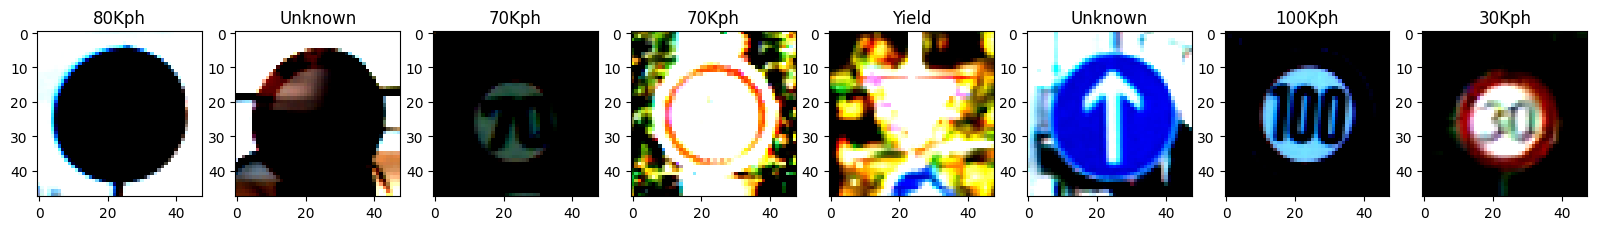

In [123]:
plot_images(images, target)

In [124]:
#plot_images(torch.concat([images[3].unsqueeze(0), (transforms.Normalize((0.3332, 0.3019, 0.3060), (0.2827, 0.2710, 0.2739))(images[3])).unsqueeze(0)]))

In [125]:
train_dataset_no_norm = datasets.ImageFolder("data/train_images", transform=image_basic_transformation)

In [126]:
train_loader_no_norm = torch.utils.data.DataLoader(train_dataset_no_norm, batch_size=8, shuffle=True, num_workers=4, pin_memory=True)

In [127]:
images, target = next(iter(train_loader_no_norm))

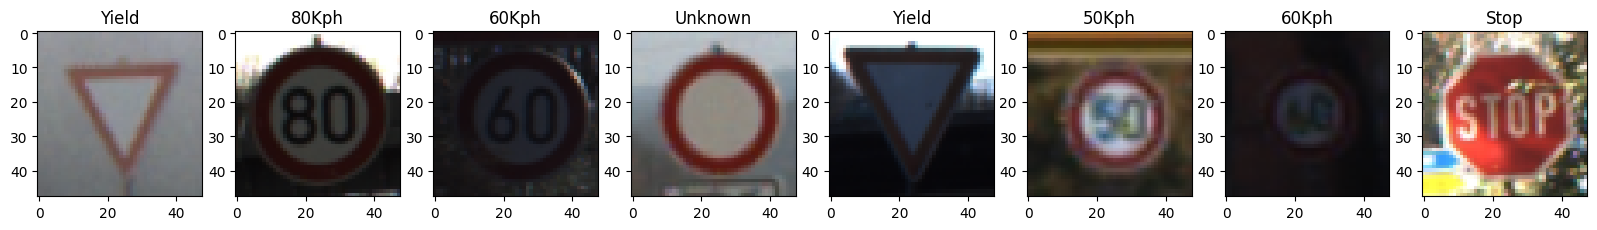

In [128]:
plot_images(images, target)